### Agitation on Production tanks - 25mt4

In [7]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [8]:
# Data Collection:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [9]:
ProductionTank.head()

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0


In [10]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
#data = pd.DataFrame(ProductionTank) 
# Count the unique materialsProductionTank produced by each tank
#Batch_counts =ProductionTank.groupby('Tank_1')['BATCHID'].nunique().reset_index()
#print(Batch_counts)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


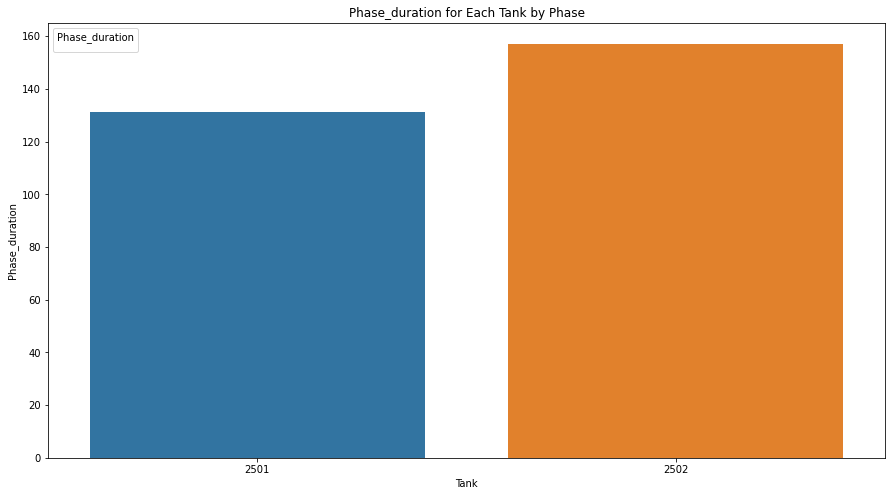

    Tank_1    BATCHID  Phase_duration  Phase_overrun  Phase_start_delay  \
0     2501  107548283              91            1.0                  0   
1     2501  107599589              50            0.0                  2   
2     2501  107599630               0            0.0                  3   
3     2501  107619398              90            0.0                  2   
4     2501  107654587              95            0.0                  1   
5     2501  107673784              50            0.0                  1   
6     2501  107692170              50            0.0                  2   
7     2501  107721584              97            2.0                  1   
8     2501  107781849              95            0.0                  2   
9     2501  107799508              60            0.0                  2   
10    2501  107820047              60            0.0                  0   
11    2501  107829242              95            0.0                  1   
12    2501  107837364    

In [12]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank) 


specific_tanks = [2501, 2502]

# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION']
filtered_data = data[(data['Instruction_Step'].isin(desired_steps)) & (data['Tank_1'].isin(specific_tanks))]



# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material'])['Phase_duration'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_duration',ci=None)
plt.title('Phase_duration for Each Tank by Phase')
plt.ylabel('Phase_duration')
plt.xlabel('Tank')
plt.legend(title='Phase_duration')
plt.show()

#Aggregate data per tank
aggregated_total_durations_df4 = filtered_data.groupby(['Tank_1','BATCHID']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_total_durations_df4)
aggregated_total_durations_df4.to_csv('Agitation25MT4.csv', index=False)

In [13]:
# Handling missing values
#aggregated_total_durations_df4.dropna(inplace=True)  # Remove rows with missing values

In [14]:
# Handling du# Handling duplicates
#aggregated_total_durations_df4.drop_duplicates(inplace=True)  # Remove duplicate rowsplicates

In [15]:
# Define columns where you want to detect and remove outliers
ProductionTank254_df = pd.DataFrame(aggregated_total_durations_df4)
#ProductionTank254_df
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
   ProductionTank254_df = remove_outliers_iqr(ProductionTank254_df, col)
# Display the cleaned DataFrame
print(ProductionTank254_df)

    Tank_1    BATCHID  Phase_duration  Phase_overrun  Phase_start_delay  \
0     2501  107548283              91            1.0                  0   
1     2501  107599589              50            0.0                  2   
2     2501  107599630               0            0.0                  3   
3     2501  107619398              90            0.0                  2   
4     2501  107654587              95            0.0                  1   
5     2501  107673784              50            0.0                  1   
6     2501  107692170              50            0.0                  2   
7     2501  107721584              97            2.0                  1   
8     2501  107781849              95            0.0                  2   
9     2501  107799508              60            0.0                  2   
11    2501  107829242              95            0.0                  1   
12    2501  107837364              95            0.0                  1   
13    2501  107858284    

In [16]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN']
ProductionTank254_df[numerical_cols] = scaler.fit_transform(ProductionTank254_df[numerical_cols])
print(ProductionTank254_df)

    Tank_1    BATCHID  Phase_duration  Phase_overrun  Phase_start_delay  \
0     2501  107548283        0.816447       0.948683          -1.596596   
1     2501  107599589       -1.022802      -0.632456           0.786383   
2     2501  107599630       -3.265789      -0.632456           1.977873   
3     2501  107619398        0.771588      -0.632456           0.786383   
4     2501  107654587        0.995886      -0.632456          -0.405107   
5     2501  107673784       -1.022802      -0.632456          -0.405107   
6     2501  107692170       -1.022802      -0.632456           0.786383   
7     2501  107721584        1.085606       2.529822          -0.405107   
8     2501  107781849        0.995886      -0.632456           0.786383   
9     2501  107799508       -0.574205      -0.632456           0.786383   
11    2501  107829242        0.995886      -0.632456          -0.405107   
12    2501  107837364        0.995886      -0.632456          -0.405107   
13    2501  107858284    

In [17]:
# For the original DataFrame
print("Original DataFrame Summary Statistics:")
print(aggregated_total_durations_df4)

# After removing outliers
print("\nCleaned DataFrame Summary Statistics:")
print(ProductionTank254_df)

Original DataFrame Summary Statistics:
    Tank_1    BATCHID  Phase_duration  Phase_overrun  Phase_start_delay  \
0     2501  107548283              91            1.0                  0   
1     2501  107599589              50            0.0                  2   
2     2501  107599630               0            0.0                  3   
3     2501  107619398              90            0.0                  2   
4     2501  107654587              95            0.0                  1   
5     2501  107673784              50            0.0                  1   
6     2501  107692170              50            0.0                  2   
7     2501  107721584              97            2.0                  1   
8     2501  107781849              95            0.0                  2   
9     2501  107799508              60            0.0                  2   
10    2501  107820047              60            0.0                  0   
11    2501  107829242              95            0.0         

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'ProductionTank2203_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank254_df)

# Define features and target
X = df.drop(['Phase_overrun','Target_Flowrate'], axis=1)
y = df['Phase_overrun']

# Define features and target
#X = df.drop(['Phase_overrun','Flowrate_KGMIN','Target_Phase_duration','Target_Flowrate','Phase_start_delay'], axis=1)
#y = df['Phase_overrun']



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
#rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor
#gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)


# Decision Tree Regressor
#dt_model = DecisionTreeRegressor(random_state=42)
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor (based on Decision Trees by default)
bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred_train = bag_model.predict(X_train)
bag_pred_test = bag_model.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)

# Extra Trees Regressor
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)
et_pred_train = et_model.predict(X_train)
et_pred_test = et_model.predict(X_test)
et_train_mse = mean_squared_error(y_train, et_pred_train)
et_test_mse = mean_squared_error(y_test, et_pred_test)
et_train_r2 = r2_score(y_train, et_pred_train)
et_test_r2 = r2_score(y_test, et_pred_test)
results_df = results_df.append({'Model': 'Extra Trees Regressor', 'Train MSE': et_train_mse, 'Test MSE': et_test_mse, 'Train R2': et_train_r2, 'Test R2': et_test_r2}, ignore_index=True)


# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('254AGresults.xlsx', index=False)


+----+-----------------------------+-------------+-------------+------------+-----------+
|    | Model                       |   Train MSE |    Test MSE |   Train R2 |   Test R2 |
+====+=============================+=============+=============+============+===========+
|  0 | Linear Regression           | 1.11262e-26 | 1.42985e-26 |  1         |  1        |
+----+-----------------------------+-------------+-------------+------------+-----------+
|  1 | Ridge Regression            | 0.85113     | 0.40934     |  0.233863  |  0.220304 |
+----+-----------------------------+-------------+-------------+------------+-----------+
|  2 | Lasso Regression            | 1.06324     | 0.744994    |  0.0429376 | -0.419036 |
+----+-----------------------------+-------------+-------------+------------+-----------+
|  3 | Random Forest Regressor     | 0.388349    | 0.20819     |  0.650431  |  0.603447 |
+----+-----------------------------+-------------+-------------+------------+-----------+
|  4 | Gra

In [19]:
# Create a list of models with their respective hyperparameters
# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42)
]

# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE back to positive
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    print(f"{model_name}:\n  Mean MSE: {mean_mse:.6f}\n  Std MSE: {std_mse:.6f}\n")
       # Save the results to an Excel file

df.to_excel("ProductionTank254_dfmodel_results.xlsx", index=False)
#a file named model_results.xlsx in the current working directory containing the mean and standard deviation of the MSE for each model. You can then open this file with Excel to view the results.

   
   

LinearRegression:
  Mean MSE: 0.000000
  Std MSE: 0.000000

Ridge:
  Mean MSE: 0.794469
  Std MSE: 0.126866

Lasso:
  Mean MSE: 1.007923
  Std MSE: 0.224312

RandomForestRegressor:
  Mean MSE: 0.532575
  Std MSE: 0.129237

GradientBoostingRegressor:
  Mean MSE: 0.305176
  Std MSE: 0.131427

SVR:
  Mean MSE: 1.283508
  Std MSE: 0.311812

MLPRegressor:
  Mean MSE: 3980015834174.937500
  Std MSE: 4297710254572.943359

DecisionTreeRegressor:
  Mean MSE: 0.950000
  Std MSE: 0.291548

AdaBoostRegressor:
  Mean MSE: 0.431094
  Std MSE: 0.297525

BaggingRegressor:
  Mean MSE: 0.499390
  Std MSE: 0.161762



In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Load your dataset (replace 'ProductionTank2202_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank254_df)

# Define features and target
#X = df.drop(['Phase_overrun','Target_Flowrate'], axis=1)
#y = df['Phase_overrun']

# Define features and target
# Define features and target
X = df.drop(['Phase_overrun','Target_Flowrate'], axis=1)
y = df['Phase_overrun']


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred_train = best_ridge.predict(X_train)
ridge_pred_test = best_ridge.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)
print(f"Best parameters for Ridge Regression: {ridge_grid.best_params_}")

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred_train = best_lasso.predict(X_train)
lasso_pred_test = best_lasso.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)
print(f"Best parameters for Lasso Regression: {lasso_grid.best_params_}")

# Random Forest Regressor with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
rf_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)
print(f"Best parameters for Random Forest Regressor: {rf_grid.best_params_}")

# Gradient Boosting Regressor with Hyperparameter Tuning
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
gb_pred_train = best_gb.predict(X_train)
gb_pred_test = best_gb.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
gb_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)
print(f"Best parameters for Gradient Boosting Regressor: {gb_grid.best_params_}")

# Decision Tree Regressor with Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_pred_train = best_dt.predict(X_train)
dt_pred_test = best_dt.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)
print(f"Best parameters for Decision Tree Regressor: {dt_grid.best_params_}")

# Bagging Regressor with Hyperparameter Tuning
bag_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bag_grid.fit(X_train, y_train)
bag_best = bag_grid.best_estimator_

# Using the best estimator from GridSearch to make predictions
bag_pred_train = bag_best.predict(X_train)
bag_pred_test = bag_best.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)
print(f"Best parameters for Bagging Regressor: {bag_grid.best_params_}")

# AdaBoost Regressor with Hyperparameter Tuning
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}
ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_model.fit(X_train, y_train)
#ada_best = ada_grid.best_estimator_

# Use the best estimator to make predictions
#ada_pred_train = best_ada.predict(X_train)
#ada_pred_test = best_ada.predict(X_test)

ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)

# Print the results DataFrame
print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('254TUN results.xlsx', index=False)

Best parameters for Ridge Regression: {'alpha': 0.01}
Best parameters for Lasso Regression: {'alpha': 0.01}
Best parameters for Random Forest Regressor: {'max_depth': None, 'n_estimators': 200}
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best parameters for Decision Tree Regressor: {'max_depth': 20}
Best parameters for Bagging Regressor: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 50}
                         Model     Train MSE      Test MSE  Train R2   Test R2
0            Linear Regression  1.112617e-26  1.429852e-26  1.000000  1.000000
1             Ridge Regression  6.081826e-02  2.895970e-02  0.945255  0.944839
2             Lasso Regression  4.613562e-01  2.192120e-01  0.584715  0.582453
3      Random Forest Regressor  1.109281e-01  1.123500e-01  0.900149  0.786000
4  Gradient Boosting Regressor  6.577111e-07  1.576154e-01  0.999999  0.699780
5      Decision Tree Regressor  0.000000e+00  2.500000e-01 

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank254_df)

# Define features and target
X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
y = df['Phase_overrun']

# Initialize k-fold cross-validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define the models to be evaluated
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42)
]

# Iterate through each model and perform k-fold cross-validation
for model in models:
    model_name = model.__class__.__name__
    train_mse_list = []
    test_mse_list = []
    train_r2_list = []
    test_r2_list = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
        train_r2_list.append(train_r2)
        test_r2_list.append(test_r2)
    
    mean_train_mse = sum(train_mse_list) / num_folds
    mean_test_mse = sum(test_mse_list) / num_folds
    mean_train_r2 = sum(train_r2_list) / num_folds
    mean_test_r2 = sum(test_r2_list) / num_folds
    
    results_df = results_df.append({'Model': model_name, 'Train MSE': mean_train_mse, 'Test MSE': mean_test_mse,
                                    'Train R2': mean_train_r2, 'Test R2': mean_test_r2}, ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('kfold_results.xlsx', index=False)

+----+---------------------------+-------------+-------------+--------------+--------------+
|    | Model                     |   Train MSE |    Test MSE |     Train R2 |      Test R2 |
+====+===========================+=============+=============+==============+==============+
|  0 | LinearRegression          | 0.765679    | 1.08491     |  0.232245    | -0.162753    |
+----+---------------------------+-------------+-------------+--------------+--------------+
|  1 | Ridge                     | 0.765877    | 1.07108     |  0.232042    | -0.146626    |
+----+---------------------------+-------------+-------------+--------------+--------------+
|  2 | Lasso                     | 0.97411     | 1.09346     |  0.0213263   | -0.243518    |
+----+---------------------------+-------------+-------------+--------------+--------------+
|  3 | RandomForestRegressor     | 0.08953     | 0.712495    |  0.91024     |  0.254194    |
+----+---------------------------+-------------+-------------+--------

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV

# Assuming you've loaded 'ProductionTank22_df2' somewhere in your code
df = pd.DataFrame(ProductionTank254_df)

#X = df.drop(['Phase_overrun'], axis=1)
#y = df['Phase_overrun']

# Define features and target
# Define features and target
X = df.drop(['Phase_overrun','Target_Flowrate'], axis=1)
y = df['Phase_overrun']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2', 'CV MSE Mean', 'CV MSE Std'])

# Function to perform model training, prediction and storing results
def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    
    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    
    train_r2 = r2_score(y_train, pred_train)
    test_r2 = r2_score(y_test, pred_test)
    
    # Perform cross-validation
    cv_scores = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    results_df.loc[name] = [name, train_mse, test_mse, train_r2, test_r2, cv_mean, cv_std]

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn_model, 'K-Nearest Neighbors')

# Support Vector Machine
svm_model = SVR(kernel='rbf')
evaluate_model(svm_model, 'Support Vector Machine')

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('knn_svm_results.xlsx', index=False)

def hypertune_model(model, params, name):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_

    evaluate_model(best_model, name)
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# K-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
hypertune_model(KNeighborsRegressor(), knn_params, 'K-Nearest Neighbors')

# Support Vector Machine
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}
hypertune_model(SVR(), svm_params, 'Support Vector Machine')

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('254mtknn_svm_results_hyper_tuned.xlsx', index=False)

+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
|                        | Model                  |   Train MSE |   Test MSE |   Train R2 |   Test R2 |   CV MSE Mean |   CV MSE Std |
+========================+========================+=============+============+============+===========+===============+==============+
| K-Nearest Neighbors    | K-Nearest Neighbors    |     1.055   |   0.64     |  0.0503516 | -0.219048 |       1.4075  |     0.608461 |
+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
| Support Vector Machine | Support Vector Machine |     1.15186 |   0.444597 | -0.0368388 |  0.153148 |       1.52172 |     0.412926 |
+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
Fitting 5 folds for each of 32 candidates, totalling 16

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank254_df)

# Define features and target
#X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
#y = df['Phase_overrun']

X = df.drop(['Phase_overrun','Target_Flowrate'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define a simple feedforward neural network
def build_simple_nn():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the simple neural network
simple_nn = build_simple_nn()
simple_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_simple_nn = simple_nn.predict(X_train_scaled)
pred_test_simple_nn = simple_nn.predict(X_test_scaled)
train_mse_simple_nn = mean_squared_error(y_train, pred_train_simple_nn)
test_mse_simple_nn = mean_squared_error(y_test, pred_test_simple_nn)
train_r2_simple_nn = r2_score(y_train, pred_train_simple_nn)
test_r2_simple_nn = r2_score(y_test, pred_test_simple_nn)
results_df = results_df.append({'Model': 'Simple Neural Network', 'Train MSE': train_mse_simple_nn,
                                'Test MSE': test_mse_simple_nn, 'Train R2': train_r2_simple_nn, 'Test R2': test_r2_simple_nn},
                               ignore_index=True)

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('Simple Neural Network.xlsx', index=False)

from keras.layers import LSTM

# Assuming X_train_scaled and X_test_scaled are already prepared

# Reshape input data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define LSTM model
def build_lstm():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the LSTM
lstm = build_lstm()
lstm.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_lstm = lstm.predict(X_train_reshaped)
pred_test_lstm = lstm.predict(X_test_reshaped)
train_mse_lstm = mean_squared_error(y_train, pred_train_lstm)
test_mse_lstm = mean_squared_error(y_test, pred_test_lstm)
train_r2_lstm = r2_score(y_train, pred_train_lstm)
test_r2_lstm = r2_score(y_test, pred_test_lstm)
results_df = results_df.append({'Model': 'LSTM Neural Network', 'Train MSE': train_mse_lstm,
                                'Test MSE': test_mse_lstm, 'Train R2': train_r2_lstm, 'Test R2': test_r2_lstm},
                               ignore_index=True)
print(tabulate(results_df, headers='keys', tablefmt='grid'))


results_df.to_excel('254LSTM SIMPLE Neural Network.xlsx', index=False)

1/1 [==============================] - 0s 36ms/step
+----+-----------------------+-------------+------------+------------+-----------+
|    | Model                 |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=======================+=============+============+============+===========+
|  0 | Simple Neural Network |    0.754612 |   0.357802 |   0.320743 |  0.318473 |
+----+-----------------------+-------------+------------+------------+-----------+
1/1 [==============================] - 0s 52ms/step
+----+-----------------------+-------------+------------+------------+-----------+
|    | Model                 |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=======================+=============+============+============+===========+
|  0 | Simple Neural Network |    0.754612 |   0.357802 |   0.320743 |  0.318473 |
+----+-----------------------+-------------+------------+------------+-----------+
|  1 | LSTM Neural Network   |    0.93765  |   0.464561 |   0.1559

In [25]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# ... [your data loading, preprocessing, etc.]

# Define a parameter grid to search through
param_grid = {
    'dense1_neurons': [32, 64, 128],
    'dense2_neurons': [16, 32, 64],
    'epochs': [30, 50],
    'batch_size': [16, 32, 64],
}

# Adjust the function to take the hyperparameters as parameters
def build_simple_nn(dense1_neurons=64, dense2_neurons=32):
    model = Sequential()
    model.add(Dense(dense1_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(dense2_neurons, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using KerasRegressor
simple_nn_model = KerasRegressor(build_fn=build_simple_nn, verbose=0)

# GridSearchCV
simple_nn_search = GridSearchCV(estimator=simple_nn_model, param_grid=param_grid, cv=3, verbose=1)
simple_nn_search_result = simple_nn_search.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best Simple NN Params:", simple_nn_search_result.best_params_)

# Predict using the best model on training data
train_preds = simple_nn_search.best_estimator_.predict(X_train_scaled)

# Calculate the MSE and R2 for the training data
train_mse = mean_squared_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

# Predict using the best model on test data
test_preds = simple_nn_search.best_estimator_.predict(X_test_scaled)

# Calculate the MSE and R2 for the test data
test_mse = mean_squared_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

# Print the results
print("Training MSE:", train_mse)
print("Training R^2:", train_r2)
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
results_df.to_excel('254mtSnn_results_hyper_tuned.xlsx', index=False)

# Here, you can use simple_nn_search_result.best_estimator_ to make predictions and evaluate the model.

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Simple NN Params: {'batch_size': 32, 'dense1_neurons': 32, 'dense2_neurons': 16, 'epochs': 30}
Training MSE: 0.8973142539379143
Training R^2: 0.19229096691945824
Test MSE: 0.4045509974486026
Test R^2: 0.22942667152647123


In [26]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the LSTM model for grid search
def create_lstm(lstm_neurons=50):
    model = Sequential()
    model.add(LSTM(lstm_neurons, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Grid search hyperparameters
lstm_param_grid = {
    'lstm_neurons': [30, 50, 70],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

lstm_model = KerasRegressor(build_fn=create_lstm, verbose=0)
lstm_search = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, verbose=1)
lstm_search_result = lstm_search.fit(X_train_reshaped, y_train)

# Print the best parameters
print("Best LSTM Params:", lstm_search_result.best_params_)

# Predict using the best model on training data
train_preds_lstm = lstm_search_result.best_estimator_.predict(X_train_reshaped)

# Calculate the MSE and R2 for the training data
train_mse_lstm = mean_squared_error(y_train, train_preds_lstm)
train_r2_lstm = r2_score(y_train, train_preds_lstm)

# Predict using the best model on test data
test_preds_lstm = lstm_search_result.best_estimator_.predict(X_test_reshaped)

# Calculate the MSE and R2 for the test data
test_mse_lstm = mean_squared_error(y_test, test_preds_lstm)
test_r2_lstm = r2_score(y_test, test_preds_lstm)

# Print the results
print("Training MSE for LSTM:", train_mse_lstm)
print("Training R^2 for LSTM:", train_r2_lstm)
print("Test MSE for LSTM:", test_mse_lstm)
print("Test R^2 for LSTM:", test_r2_lstm)
results_df.to_excel('254mtSnn_lstm results_hyper_tuned.xlsx', index=False)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best LSTM Params: {'batch_size': 64, 'epochs': 30, 'lstm_neurons': 50}
Training MSE for LSTM: 1.0275250631573845
Training R^2 for LSTM: 0.07508292486536416
Test MSE for LSTM: 0.4963430847085452
Test R^2 for LSTM: 0.05458460055515191


In [27]:
#!pip install -U keras-tuner
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters grid for Simple Neural Network
def create_simple_nn(neurons_layer1=64, neurons_layer2=32):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

simple_nn_param_grid = {
    'neurons_layer1': [32, 64, 128],
    'neurons_layer2': [16, 32, 64],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

simple_nn_model = KerasRegressor(build_fn=create_simple_nn, verbose=0)
simple_nn_search = RandomizedSearchCV(estimator=simple_nn_model, param_distributions=simple_nn_param_grid, n_iter=5, cv=3, verbose=1)
simple_nn_search_result = simple_nn_search.fit(X_train_scaled, y_train)

# Display results for Simple NN
simple_nn_results = pd.DataFrame(simple_nn_search_result.cv_results_)[['param_neurons_layer1', 'param_neurons_layer2', 'param_batch_size', 'param_epochs', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print(tabulate(simple_nn_results, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
simple_nn_results.to_excel('simple_nn.xlsx', index=False)
print("Best Simple NN Params:", simple_nn_search_result.best_params_)

# Define hyperparameters grid for LSTM
def create_lstm(lstm_neurons=50):
    model = Sequential()
    model.add(LSTM(lstm_neurons, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

lstm_param_grid = {
    'lstm_neurons': [30, 50, 70],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

lstm_model = KerasRegressor(build_fn=create_lstm, verbose=0)
lstm_search = RandomizedSearchCV(estimator=lstm_model, param_distributions=lstm_param_grid, n_iter=5, cv=3, verbose=1)
lstm_search_result = lstm_search.fit(X_train_reshaped, y_train)

# Display results for LSTM
lstm_results = pd.DataFrame(lstm_search_result.cv_results_)[['param_lstm_neurons', 'param_batch_size', 'param_epochs', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print(tabulate(lstm_results, headers='keys', tablefmt='grid'))
print("Best LSTM Params:", lstm_search_result.best_params_)
# Save results DataFrame to an Excel file
lstm_results.to_excel('254MTLSTM_SNNresults.xlsx', index=False)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
+----+------------------------+------------------------+--------------------+----------------+-------------------+------------------+-------------------+
|    |   param_neurons_layer1 |   param_neurons_layer2 |   param_batch_size |   param_epochs |   mean_test_score |   std_test_score |   rank_test_score |
+====+========================+========================+====================+================+===================+==================+===================+
|  0 |                     64 |                     32 |                 32 |             50 |          -1.49504 |         0.420982 |                 2 |
+----+------------------------+------------------------+--------------------+----------------+-------------------+------------------+-------------------+
|  1 |                    128 |                     16 |                 32 |             30 |          -1.4338  |         0.28816  |                 1 |
+----+----------

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank254_df)

# Define features and target
# Define features and target
X = df.drop(['Phase_overrun','Target_Flowrate'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define a simple feedforward neural network
def build_simple_nn():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the simple neural network
simple_nn = build_simple_nn()
simple_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_simple_nn = simple_nn.predict(X_train_scaled)
pred_test_simple_nn = simple_nn.predict(X_test_scaled)
train_mse_simple_nn = mean_squared_error(y_train, pred_train_simple_nn)
test_mse_simple_nn = mean_squared_error(y_test, pred_test_simple_nn)
train_r2_simple_nn = r2_score(y_train, pred_train_simple_nn)
test_r2_simple_nn = r2_score(y_test, pred_test_simple_nn)
results_df = results_df.append({'Model': 'Dense Neural Network', 'Train MSE': train_mse_simple_nn,
                                'Test MSE': test_mse_simple_nn, 'Train R2': train_r2_simple_nn, 'Test R2': test_r2_simple_nn},
                               ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('254neural_network_results1.xlsx', index=False)

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(neurons_layer1=128, neurons_layer2=64, neurons_layer3=32):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dense(neurons_layer3, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

param_dist = {
    'batch_size': [16, 32, 64],
    'epochs': [20, 50, 100],
    'neurons_layer1': [64, 128, 256],
    'neurons_layer2': [32, 64, 128],
    'neurons_layer3': [16, 32, 64]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3)
random_search_result = random_search.fit(X_train_scaled, y_train)

print("Best Score: ", random_search_result.best_score_)
print("Best Params: ", random_search_result.best_params_)

best_nn = random_search_result.best_estimator_.model
pred_train_best_nn = best_nn.predict(X_train_scaled)
pred_test_best_nn = best_nn.predict(X_test_scaled)

train_mse_best_nn = mean_squared_error(y_train, pred_train_best_nn)
test_mse_best_nn = mean_squared_error(y_test, pred_test_best_nn)
train_r2_best_nn = r2_score(y_train, pred_train_best_nn)
test_r2_best_nn = r2_score(y_test, pred_test_best_nn)

results_df = results_df.append({'Model': 'Dense Neural Network (Optimized)', 'Train MSE': train_mse_best_nn,
                                'Test MSE': test_mse_best_nn, 'Train R2': train_r2_best_nn, 'Test R2': test_r2_best_nn},
                               ignore_index=True)
#Remember that the parameters given above are just examples; you can expand or restrict the grid as per your computational capability and needs. Also, depending on the number of combinations and the size of your data, this can take a significant amount of time to run.


best_nn = random_search_result.best_estimator_.model
pred_train_best_nn = best_nn.predict(X_train_scaled)
pred_test_best_nn = best_nn.predict(X_test_scaled)

train_mse_best_nn = mean_squared_error(y_train, pred_train_best_nn)
test_mse_best_nn = mean_squared_error(y_test, pred_test_best_nn)
train_r2_best_nn = r2_score(y_train, pred_train_best_nn)
test_r2_best_nn = r2_score(y_test, pred_test_best_nn)

results_df = results_df.append({'Model': 'Dense Neural Network (Optimized)', 'Train MSE': train_mse_best_nn,
                                'Test MSE': test_mse_best_nn, 'Train R2': train_r2_best_nn, 'Test R2': test_r2_best_nn},
                               ignore_index=True)

results_df.to_excel('254mT DENSEresults_hyper_tuned.xlsx', index=False)
print(tabulate(results_df, headers='keys', tablefmt='grid'))


1/1 [==============================] - 0s 40ms/step
+----+----------------------+-------------+------------+------------+-----------+
|    | Model                |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+======================+=============+============+============+===========+
|  0 | Dense Neural Network |    0.672114 |   0.428244 |   0.395003 |  0.184298 |
+----+----------------------+-------------+------------+------------+-----------+
Best Score:  -1.627251108487447
Best Params:  {'neurons_layer3': 32, 'neurons_layer2': 64, 'neurons_layer1': 128, 'epochs': 20, 'batch_size': 32}
1/1 [==============================] - 0s 31ms/step
+----+----------------------------------+-------------+------------+------------+-----------+
|    | Model                            |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+==================================+=============+============+============+===========+
|  0 | Dense Neural Network             |    0.672114 |   